<a href="https://colab.research.google.com/github/yuna1998/datamining/blob/main/Regularization_Methods_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ridge regression for Boston data**

In [1]:
install.packages("MASS")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(MASS)

In [3]:
x = model.matrix(medv~., Boston[,-1])
y = Boston$medv

In [4]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




In [5]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-1



In [6]:
grid = 10 ^ seq(10, -2, length = 100)

In [7]:
ridge.mod = glmnet(x, y, alpha = 0, lambda = grid)

In [8]:
dim(coef(ridge.mod))

[1]  14 100

In [9]:
ridge.mod$lambda[50]

[1] 11497.57

In [10]:
coef(ridge.mod)[,50]

(Intercept)   (Intercept)            zn         indus          chas 
 2.255282e+01  0.000000e+00  1.131370e-04 -5.161438e-04  5.066565e-03 
          nox            rm           age           dis           rad 
-2.698245e-02  7.257690e-03 -9.794103e-05  8.658362e-04 -3.205305e-04 
          tax       ptratio         black         lstat 
-2.033881e-05 -1.718485e-03  2.673770e-05 -7.567745e-04

In [11]:
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 0.0284792

In [12]:
ridge.mod$lambda[60]

[1] 705.4802

In [13]:
coef(ridge.mod)[,60]

(Intercept)   (Intercept)            zn         indus          chas 
22.8243456074  0.0000000000  0.0017109403 -0.0078104146  0.0812186906 
          nox            rm           age           dis           rad 
-0.4061543945  0.1139874095 -0.0014691896  0.0124434167 -0.0048077065 
          tax       ptratio         black         lstat 
-0.0003082179 -0.0266976960  0.0004098028 -0.0117660844

In [14]:
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 0.4308672

In [15]:
predict(ridge.mod, s = 50, type = "coefficients")[1:14,]

(Intercept)  (Intercept)           zn        indus         chas          nox 
23.581967133  0.000000000  0.011809617 -0.054056159  0.925102552 -2.676288162 
          rm          age          dis          rad          tax      ptratio 
 1.143573526 -0.009118112  0.026320610 -0.028866269 -0.002151946 -0.241991361 
       black        lstat 
 0.003291996 -0.108772109

In [16]:
set.seed(1)
train = sample(1:nrow(x), nrow(x)/2)
test = (-train)
y.test = y[test]

In [17]:
ridge.mod = glmnet(x[train,], y[train], alpha = 0, lambda = grid, thresh = 1e-12)


In [18]:
ridge.pred = predict(ridge.mod, s = 4, newx = x[test,])
mean((ridge.pred-y.test)^2)

[1] 31.56

In [19]:
mean((mean(y[train])-y.test)^2)

[1] 93.08381

In [20]:
ridge.pred = predict(ridge.mod, s = 1e+10, newx = x[test,])
mean((ridge.pred-y.test)^2)

[1] 93.08381

In [21]:
ridge.pred = predict(ridge.mod, s = 0, newx = x[test,])
mean((ridge.pred - y.test)^2)

[1] 27.3697

In [22]:
lm(y ~ x, subset = train)


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
 (Intercept)  x(Intercept)           xzn        xindus         xchas  
   33.137610            NA      0.026471      0.045351      2.418664  
        xnox           xrm          xage          xdis          xrad  
  -12.815899      4.146477     -0.002844     -1.184517      0.329363  
        xtax      xptratio        xblack        xlstat  
   -0.019095     -0.955238      0.008129     -0.521465  


In [23]:
predict(ridge.mod, s = 0, type = "coefficients")[1:14,]

(Intercept)   (Intercept)            zn         indus          chas 
 32.935825148   0.000000000   0.026235908   0.043403475   2.430252571 
          nox            rm           age           dis           rad 
-12.725264199   4.153428488  -0.003037956  -1.180007782   0.323732502 
          tax       ptratio         black         lstat 
 -0.018794622  -0.952790181   0.008118162  -0.520091304

In [24]:
set.seed(1)
cv.out = cv.glmnet(x[train,], y[train], alpha = 0)

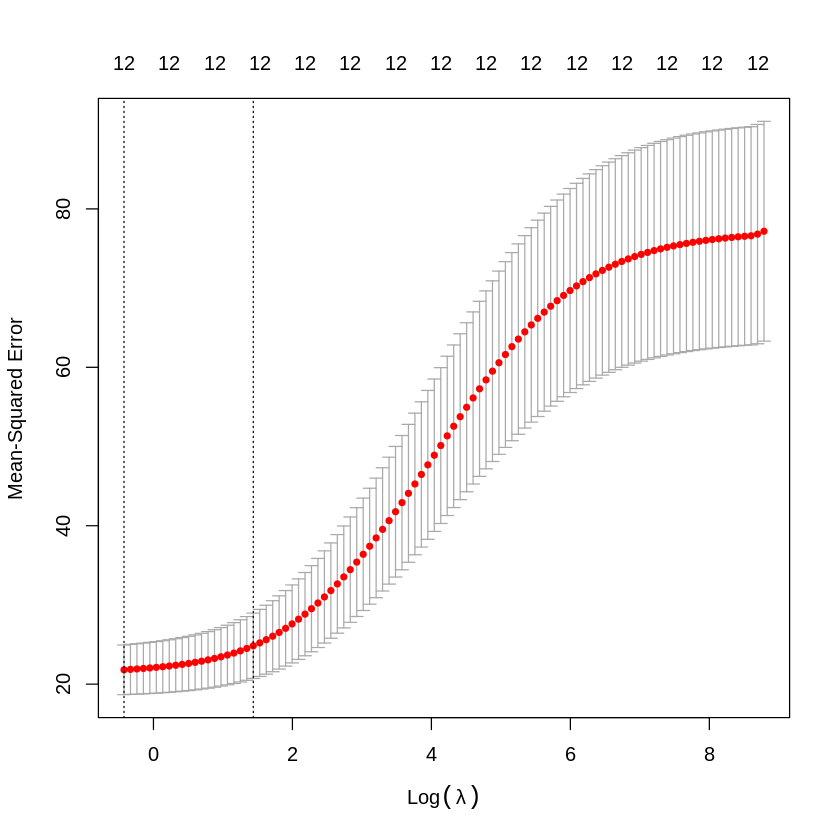

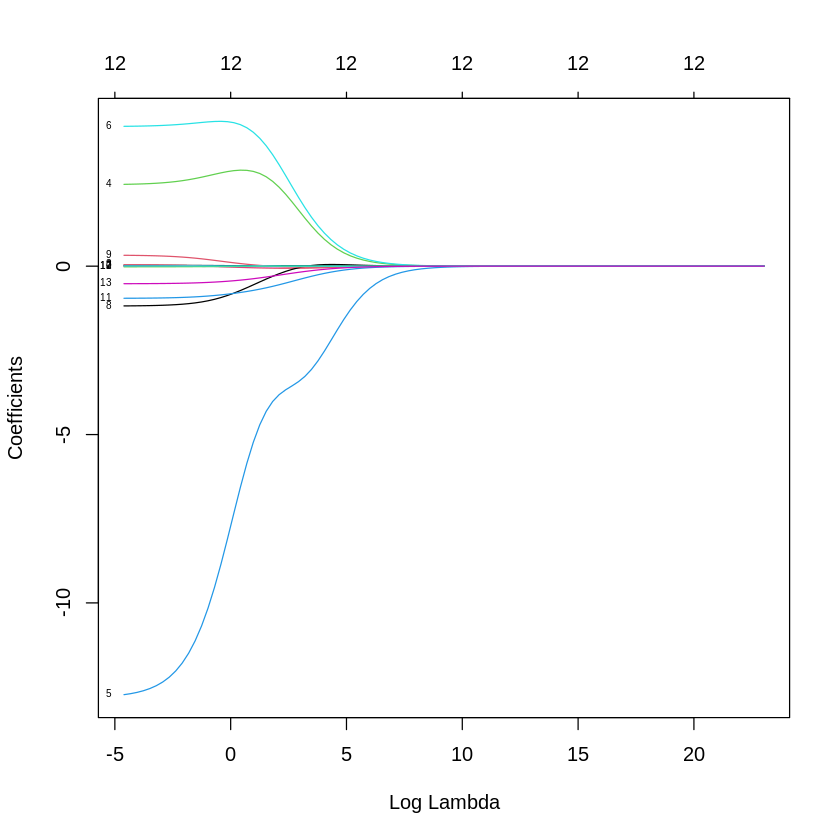

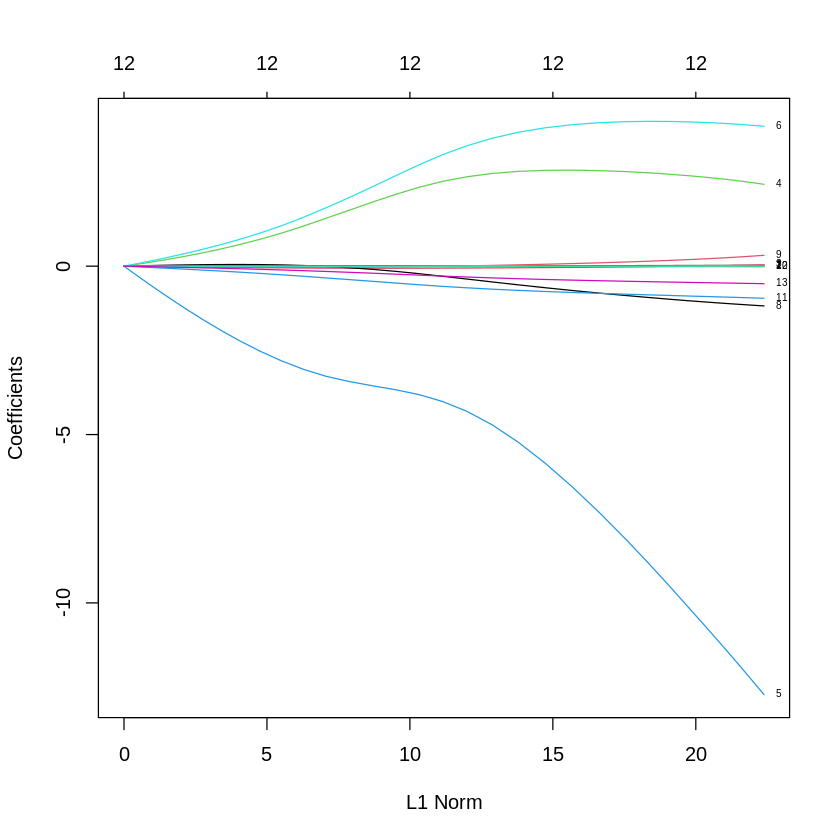

In [25]:
plot(cv.out)
plot(ridge.mod, xvar = 'lambda', label = TRUE)
plot(ridge.mod, xvar = 'norm', label = TRUE)

In [26]:
bestlm = cv.out$lambda.min
bestlm

[1] 0.6546267

In [27]:
ridge.pred = predict(ridge.mod, s = bestlm, newx = x[test,])
mean((ridge.pred - y.test)^2)

[1] 27.59975

In [28]:
out = glmnet(x,y, alpha = 0)
predict(out, type = "coefficients", s = bestlm)[1:14,]

(Intercept)   (Intercept)            zn         indus          chas 
 27.590848956   0.000000000   0.030239874  -0.031488287   3.000288747 
          nox            rm           age           dis           rad 
-11.619654604   4.031067634  -0.003975329  -1.072787096   0.119246630 
          tax       ptratio         black         lstat 
 -0.006158720  -0.854263243   0.009940153  -0.490560791

#**LASSO for Boston data**


Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


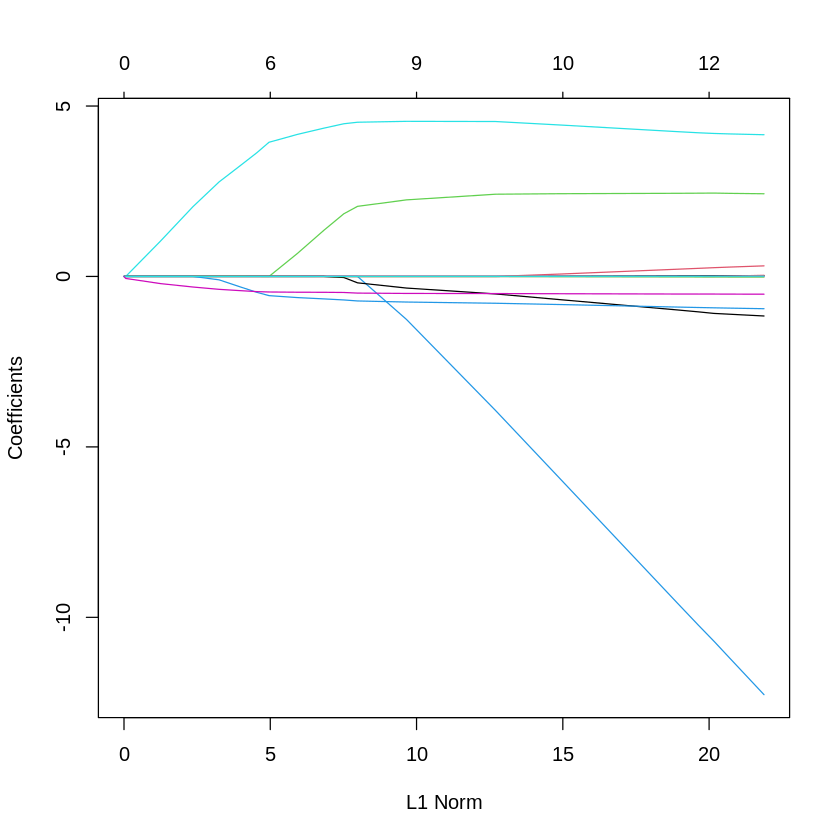

In [30]:
lasso.mod = glmnet(x[train,], y[train], alpha = 1, lambda  = grid)
plot(lasso.mod)

In [31]:
set.seed(1)

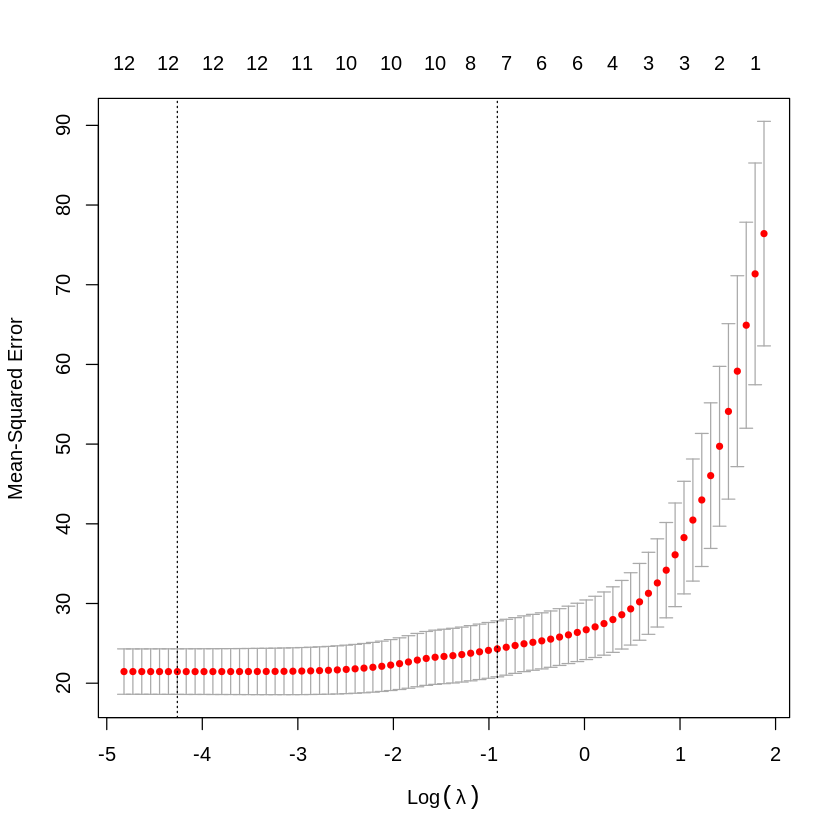

In [32]:
cv.out = cv.glmnet(x[train,], y[train], alpha = 1)
plot(cv.out)

In [33]:
bestlm = cv.out$lambda.min

In [34]:
lasso.pred = predict(lasso.mod, s = bestlm, newx = x[test,])
mean((lasso.pred-y.test)^2)

[1] 27.37198

In [35]:
out = glmnet(x,y,alpha = 1, lambda = grid)
lasso.coef = predict(out, type = "coefficients", s= bestlm)[1:14,]
lasso.coef

(Intercept)   (Intercept)            zn         indus          chas 
 34.331538881   0.000000000   0.039799402   0.008651421   2.834602359 
          nox            rm           age           dis           rad 
-16.123886246   3.869069004   0.000000000  -1.366773816   0.220717932 
          tax       ptratio         black         lstat 
 -0.010686973  -0.930322099   0.010153256  -0.547299396

In [36]:
lasso.coef[lasso.coef !=0]

(Intercept)            zn         indus          chas           nox 
 34.331538881   0.039799402   0.008651421   2.834602359 -16.123886246 
           rm           dis           rad           tax       ptratio 
  3.869069004  -1.366773816   0.220717932  -0.010686973  -0.930322099 
        black         lstat 
  0.010153256  -0.547299396

#**Elastic net for Boston data**

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


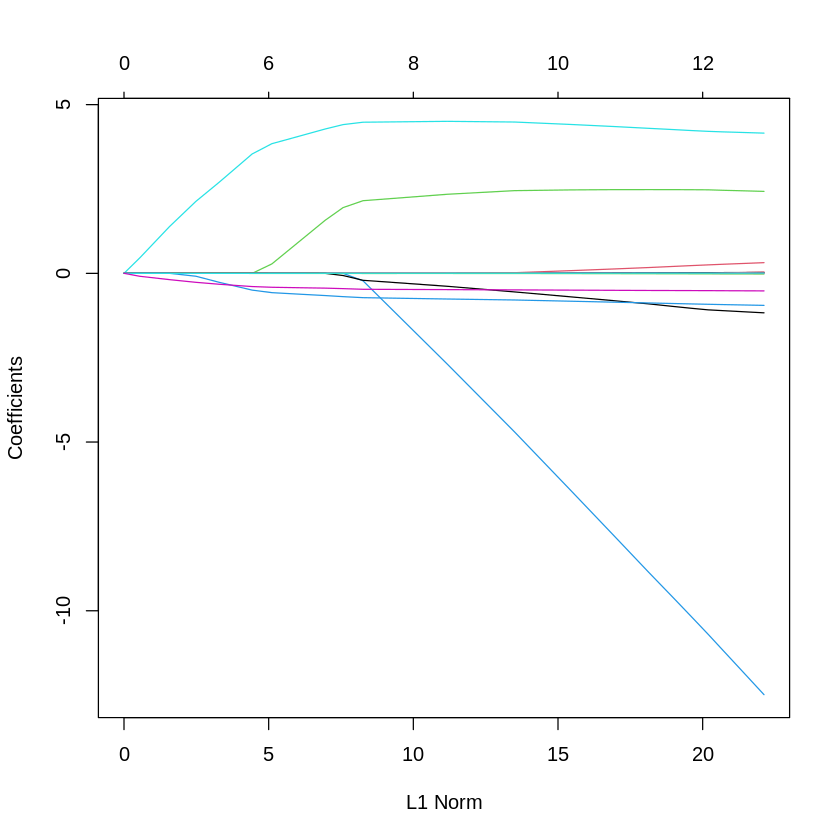

In [37]:
enet = glmnet(x[train,], y[train], alpha = 0.5, lambda = grid)
plot(enet)

In [38]:
set.seed(1)

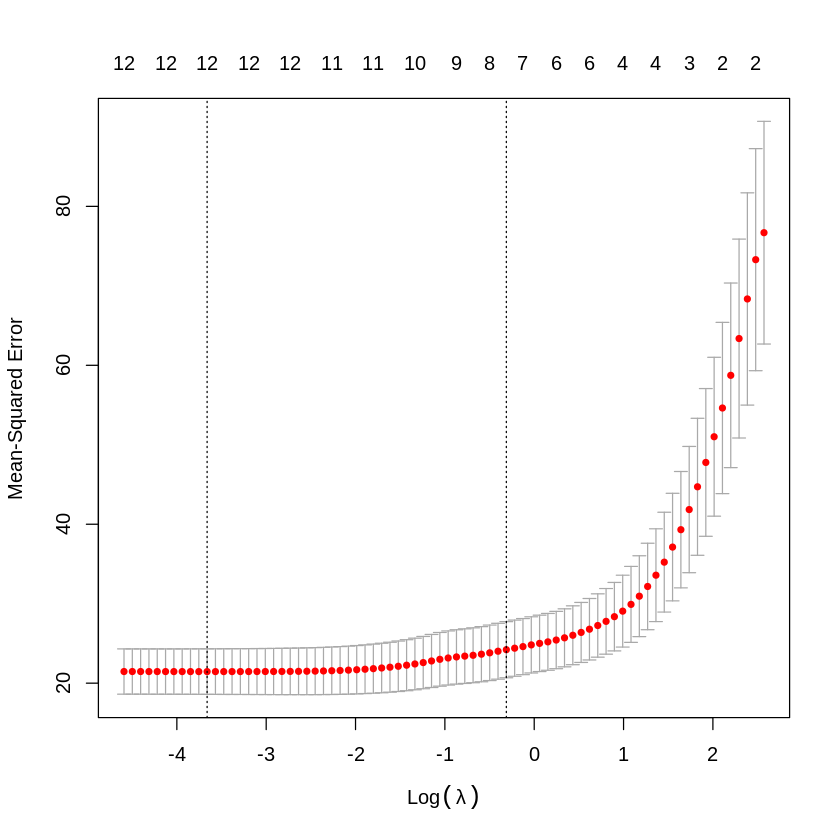

In [39]:
cv.outenet = cv.glmnet(x[train,], y[train], alpha = 0.5)
plot(cv.outenet)

In [40]:
bestlmenet = cv.outenet$lambda.min

In [41]:
enet.pred = predict(enet, s = bestlmenet, newx = x[test,])
mean((enet.pred - y.test)^2)

[1] 27.35732

In [42]:
out.enet = glmnet(x,y, alpha = 0.5, lambda = grid)
enet.coef = predict(out.enet, type = "coefficients", s = bestlmenet)[1:14,]
enet.coef

(Intercept)   (Intercept)            zn         indus          chas 
 34.221907897   0.000000000   0.039745726   0.007666906   2.841663938 
          nox            rm           age           dis           rad 
-16.082282989   3.871908132   0.000000000  -1.363559144   0.218115067 
          tax       ptratio         black         lstat 
 -0.010553753  -0.928931230   0.010151816  -0.546278952

In [43]:
enet.coef[enet.coef!=0]

(Intercept)            zn         indus          chas           nox 
 34.221907897   0.039745726   0.007666906   2.841663938 -16.082282989 
           rm           dis           rad           tax       ptratio 
  3.871908132  -1.363559144   0.218115067  -0.010553753  -0.928931230 
        black         lstat 
  0.010151816  -0.546278952

In [44]:
set.seed(1)
train = sample(1:nrow(x), nrow(x)/2)
test = (-train)

In [45]:
x.train = x[train,]
x.test = x[test,]
y.train = y[train]
y.test = y[test]

In [46]:
install.packages("doParallel")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [47]:
library(doParallel)

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [48]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [52]:
library(caret)

In [53]:
nc = detectCores()
registerDoParallel(nc)

In [55]:
myControl = trainControl(method = "cv", number = 10, allowParallel = T)

In [56]:
set.seed(10)

In [57]:
fit = train(x.train, y.train, method = "glmnet", trControl = myControl, tuneLength = 5)
fit

glmnet 

253 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 228, 227, 226, 228, 228, 228, ... 
Resampling results across tuning parameters:

  alpha  lambda       RMSE      Rsquared   MAE     
  0.100  0.006077014  4.410549  0.7478376  3.180469
  0.100  0.028207002  4.409068  0.7479862  3.178409
  0.100  0.130925312  4.400913  0.7485624  3.158815
  0.100  0.607701493  4.450602  0.7445887  3.185823
  0.100  2.820700591  4.763443  0.7252983  3.450733
  0.325  0.006077014  4.410219  0.7478583  3.180610
  0.325  0.028207002  4.407680  0.7481830  3.175912
  0.325  0.130925312  4.402006  0.7485645  3.157970
  0.325  0.607701493  4.584263  0.7327447  3.321978
  0.325  2.820700591  4.995194  0.7179697  3.619486
  0.550  0.006077014  4.410551  0.7479056  3.180547
  0.550  0.028207002  4.406323  0.7483410  3.173318
  0.550  0.130925312  4.413153  0.7479501  3.160894
  0.550  0.607701493  4.662551  0.7263654  3.386810
  0.550  2.820700591 

In [58]:
fit$bestTune

,alpha,lambda
,<dbl>,<dbl>
3,0.1,0.1309253


In [59]:
pred = predict.train(fit, x.test)
mean((y.test-pred)^2)

[1] 27.30286

In [60]:
myGrid = expand.grid(alpha = seq(0,1, by = 0.05), lambda = seq(0,5,length = 20))

In [61]:
set.seed(100)
fit = train(x.train, y.train, method = "glmnet", trControl = myControl, tuneGrid = myGrid, metric = "RMSE")
fit$bestTune

,alpha,lambda
,<dbl>,<dbl>
22,0.05,0.2631579


In [62]:
pred = predict.train(fit, x.test)
mean((y.test - pred)^2)

[1] 27.33782

#**Regularization for logistic regression**

In [ ]:
hdata = read.csv(file = "Heart.csv")